# CF 6.3 Geographic Visualization
## This script contains the following:
### 01. Import data and libraries
### 02. Further Data Wrangling and Cleaning
### 03. Plotting a Choropleth
### 04. Saving and Exporting files
### Appendix

# 01. Import libraries and files

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# Import JSONfile
country_geo = r'C:\Users\olufunsoo\Downloads\us-states json file.json'

In [3]:
# Checking output
country_geo

'C:\\Users\\olufunsoo\\Downloads\\us-states json file.json'

In [4]:
# For matplotlib visuals to appear in the notebook without 'calling' for it
%matplotlib inline

In [6]:
# Create path
path = r'C:\Users\olufunsoo\Documents\CFProject'

In [11]:
# Import data file as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_Updated.csv'), index_col = False)

In [12]:
# Check output
df.head()

Unnamed: 0.1  Unnamed: 0 Federal Provider Number Provider City  \
0             0           0                   15019        ELMORE   
1             1           1                   15113       DECATUR   
2             2           2                   15112      TUSKEGEE   
3             3           3                   15114        JASPER   
4             4           4                   15123        CHATOM   

  Provider State Provider County Name            Ownership Type  \
0             AL               Elmore  For profit - Corporation   
1             AL               Morgan  For profit - Corporation   
2             AL                Macon  For profit - Corporation   
3             AL               Walker  For profit - Corporation   
4             AL           Washington       Government - County   

   Number of Certified Beds  Number of Residents in Certified Beds  \
0                       124                                    102   
1                       183                                    168   
2                        77                                     77   
3                       107                                     96   
4                        88                                     81   

           Provider Type  ...  Cycle 3 Number of Health Revisits  \
0  Medicare and Medicaid  ...                                1.0   
1  Medicare and Medicaid  ...                                1.0   
2  Medicare and Medicaid  ...                                1.0   
3  Medicare and Medicaid  ...                                1.0   
4  Medicare and Medicaid  ...                                1.0   

  Cycle 3 Health Revisit Score  Cycle 3 Total Health Score  \
0                          0.0                        24.0   
1                          0.0                        40.0   
2                          0.0                        16.0   
3                          0.0                        52.0   
4                          0.0                        20.0   

   Total Weighted Health Survey Score  Number of Facility Reported Incidents  \
0                              22.667                                      0   
1                              48.667                                      0   
2                              15.333                                      0   
3                              25.333                                      0   
4                              13.333                                      0   

  Number of Substantiated Complaints Total Number of Penalties  \
0                                  1                         1   
1                                  3                         1   
2                                  0                         0   
3                                  3                         1   
4                                  0                         0   

   Processing Date  Nursing Home Age  Health Survey Score category  
0       2016-09-01        15584 days                    Good Score  
1       2016-09-01        17130 days                    Good Score  
2       2016-09-01        14976 days                    Good Score  
3       2016-09-01        16683 days                    Good Score  
4       2016-09-01        15219 days                    Good Score  

[5 rows x 53 columns]

# 02. Further Data Wrangling and Cleaning

### Dropping Columns

In [22]:
# Dropping more unnecessary columns
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'With a Resident and Family Council', 'Cycle 1 Standard Survey Health Date', 'Cycle 2 Standard Health Survey Date', 'Cycle 3 Standard Health Survey Date'])

In [23]:
df.shape

(15050, 48)

### Deriving New Column 'STATE' from 'Provider State'

In [36]:
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [37]:
df['STATE'] = df['Provider State'].map(state_dict)

In [38]:
df['STATE']

0        Alabama
1        Alabama
2        Alabama
3        Alabama
4        Alabama
          ...   
15045      Texas
15046      Texas
15047      Texas
15048      Texas
15049      Texas
Name: STATE, Length: 15050, dtype: object

### Consistency Checks

##### Missing values checks

In [39]:
# Check for missing values

df.isnull().sum()

Federal Provider Number                                             0
Provider City                                                       0
Provider State                                                      0
Provider County Name                                                0
Ownership Type                                                      0
Number of Certified Beds                                            0
Number of Residents in Certified Beds                               0
Provider Type                                                       0
Provider Resides in Hospital                                        0
Date First Approved to Provide Medicare and Medicaid services       0
Continuing Care Retirement Community                                0
Special Focus Facility                                              0
Provider Changed Ownership in Last 12 Months                        0
Automatic Sprinkler Systems in All Required Areas                   0
Overall Rating      

In [40]:
df_nan = df[df['STATE'].isnull() == True]

In [41]:
df_nan

Federal Provider Number Provider City Provider State  \
71                      95039    WASHINGTON             DC   
730                    405018       HUMACAO             PR   
2559                    95034    WASHINGTON             DC   
2560                    95038    WASHINGTON             DC   
2561                    95031    WASHINGTON             DC   
2562                    95030    WASHINGTON             DC   
2563                 9.00E+20    WASHINGTON             DC   
2565                    95036    WASHINGTON             DC   
2607                    95025    WASHINGTON             DC   
2608                    95027    WASHINGTON             DC   
2610                    95015    WASHINGTON             DC   
2611                    95028    WASHINGTON             DC   
2613                    95022    WASHINGTON             DC   
2614                    95005    WASHINGTON             DC   
2615                    95021    WASHINGTON             DC   
2617                    95026    WASHINGTON             DC   
2618                    95020    WASHINGTON             DC   
2620                    95024    WASHINGTON             DC   
2621                    95019    WASHINGTON             DC   
2622                    95014    WASHINGTON             DC   
11351                  405025     VEGA BAJA             PR   
11439                  405029   HORMIGUEROS             PR   
11831                  405023         PONCE             PR   

      Provider County Name            Ownership Type  \
71            The District  Government - City/county   
730                Humacao  Non profit - Corporation   
2559          The District  Non profit - Corporation   
2560          The District  Non profit - Corporation   
2561          The District  For profit - Partnership   
2562          The District  For profit - Corporation   
2563          The District  Non profit - Corporation   
2565          The District  For profit - Corporation   
2607          The District  Non profit - Corporation   
2608          The District  For profit - Corporation   
2610          The District  For profit - Corporation   
2611          The District  Non profit - Corporation   
2613          The District  For profit - Corporation   
2614          The District  Non profit - Corporation   
2615          The District  Non profit - Corporation   
2617          The District  Non profit - Corporation   
2618          The District  Non profit - Corporation   
2620          The District  For profit - Corporation   
2621          The District  For profit - Corporation   
2622          The District  Non profit - Corporation   
11351            Vega Baja  For profit - Corporation   
11439          Hormigueros  For profit - Corporation   
11831                Ponce  Non profit - Corporation   

       Number of Certified Beds  Number of Residents in Certified Beds  \
71                          120                                    117   
730                          62                                     20   
2559                        252                                    241   
2560                         50                                     49   
2561                        180                                    171   
2562                         45                                     40   
2563                         40                                     39   
2565                        230                                    217   
2607                         60                                     58   
2608                        117                                    114   
2610                        183                                    168   
2611                         60                                     50   
2613                        360                                    354   
2614                        192                                     77   
2615                         27                               

In [42]:
# Updating 'state_dict'
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [43]:
df['STATE'] = df['Provider State'].map(state_dict)

In [44]:
# Dropping column 'Health Survey Score category'
df = df.drop(columns = ['Health Survey Score category'])

In [45]:
# Checking output
df.isnull().sum()

Federal Provider Number                                            0
Provider City                                                      0
Provider State                                                     0
Provider County Name                                               0
Ownership Type                                                     0
Number of Certified Beds                                           0
Number of Residents in Certified Beds                              0
Provider Type                                                      0
Provider Resides in Hospital                                       0
Date First Approved to Provide Medicare and Medicaid services      0
Continuing Care Retirement Community                               0
Special Focus Facility                                             0
Provider Changed Ownership in Last 12 Months                       0
Automatic Sprinkler Systems in All Required Areas                  0
Overall Rating                    

In [55]:
# Creating subset for the variables necessary for the Geospatial analysis
df_geo = df[['Federal Provider Number', 'STATE', 'Number of Certified Beds', 'Number of Residents in Certified Beds', 'Overall Rating', 'Staffing Rating']]

In [56]:
df_geo

Federal Provider Number    STATE  Number of Certified Beds  \
0                       15019  Alabama                       124   
1                       15113  Alabama                       183   
2                       15112  Alabama                        77   
3                       15114  Alabama                       107   
4                       15123  Alabama                        88   
...                       ...      ...                       ...   
15045                  676321    Texas                       120   
15046                  676344    Texas                        90   
15047                  676361    Texas                        80   
15048                  676362    Texas                       103   
15049                  676370    Texas                        35   

       Number of Residents in Certified Beds  Overall Rating  Staffing Rating  
0                                        102             4.0              4.0  
1                                        168             1.0              3.0  
2                                         77             5.0              4.0  
3                                         96             4.0              5.0  
4                                         81             4.0              4.0  
...                                      ...             ...              ...  
15045                                    110             1.0              1.0  
15046                                     37             1.0              2.0  
15047                                     64             1.0              1.0  
15048                                    103             2.0              2.0  
15049                                     33             1.0              1.0  

[15050 rows x 6 columns]

##### Extreme values checks

<Axes: xlabel='Number of Certified Beds', ylabel='Count'>

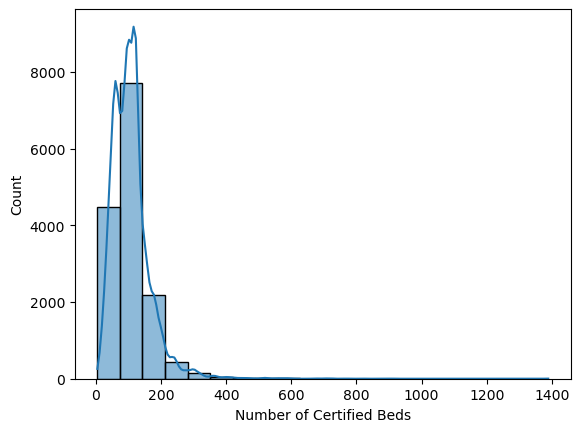

In [59]:
# Checking for extreme value in 'Number of Certified Beds'
sns.histplot(df_geo['Number of Certified Beds'], bins=20, kde = True)

In [60]:
# Check how many extreme values

df_geo[df_geo['Number of Certified Beds'] > 800] # Google research shows the highest number of certified beds in 2022 was 874 beds

Federal Provider Number         STATE  Number of Certified Beds  \
718                   395780  Pennsylvania                       908   
7656                  335462      New York                       816   
8818                  335092      New York                      1389   

      Number of Residents in Certified Beds  Overall Rating  Staffing Rating  
718                                     747             1.0              4.0  
7656                                    725             5.0              1.0  
8818                                    159             5.0              5.0

##### These records will be left as there is the possibility of nursing homes have these values of certified beds

<Axes: xlabel='Overall Rating', ylabel='Count'>

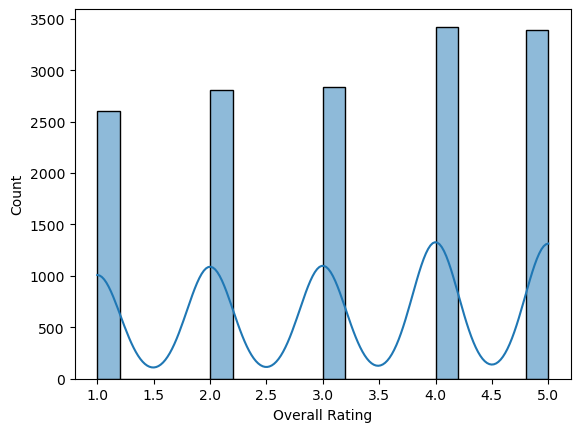

In [57]:
# Check the rating variables

sns.histplot(df_geo['Overall Rating'], bins=20, kde = True)

<Axes: xlabel='Staffing Rating', ylabel='Count'>

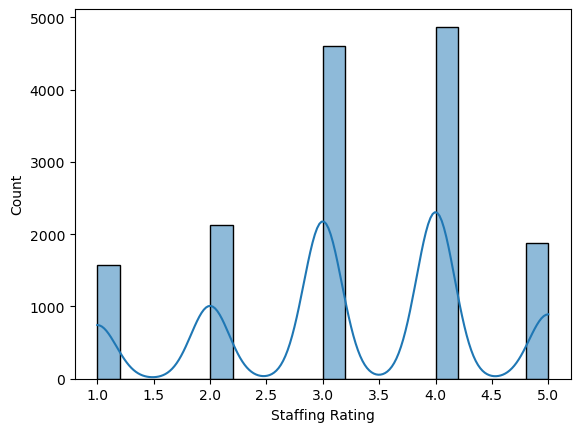

In [58]:
sns.histplot(df_geo['Staffing Rating'], bins=20, kde = True)

# 03. Plotting a Choropleth

In [61]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df_geo[['STATE','Overall Rating']]
data_to_plot.head()

STATE  Overall Rating
0  Alabama             4.0
1  Alabama             1.0
2  Alabama             5.0
3  Alabama             4.0
4  Alabama             4.0

In [62]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE', 'Overall Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

map

# 04. Saving and Exporting files

In [63]:
# Save map
map.save('plot_data.html')

In [66]:
# Exporting df as 'Project_Data_Updated_0311.csv'
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_Updated_0311.csv'))

## Appendix
#### Majority of the states in the US have nursing homes with good overall ratings with scores between 3.0 and 5.0. 7 states are shown to have nursing homes with poor overall ratings.
#### This analysis answers the question "2.	Which states have nursing homes with good ratings? (and vice versa)."
#### The states with the lowest overall rating seem to be big state. So it leads to the question "Does the size of a state have any impact on the the overall rating of a nursing home? Is there a relationship between the size of a state and the rating of the nursing homes in the respective state?